“Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.”

![Word Cloud](wordcloud1.png)

Advantages of Word Clouds :

1. Analyzing customer feedback/ review.
2. Identifying new SEO (Search Engine Optimization) keywords to target.

In [ ]:
#Importing required librarires

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Data 
book = open('HoB.txt', 'r',encoding='utf-8').read()

#Remove Stop Words
book_stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
book_wc = WordCloud(background_color='white', max_words=5000, stopwords=book_stopwords)

# generate the word cloud
book_wc.generate(book)

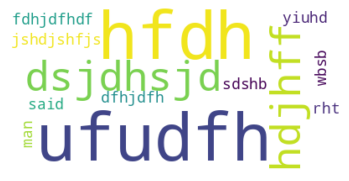

In [ ]:
# display the word cloud

plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

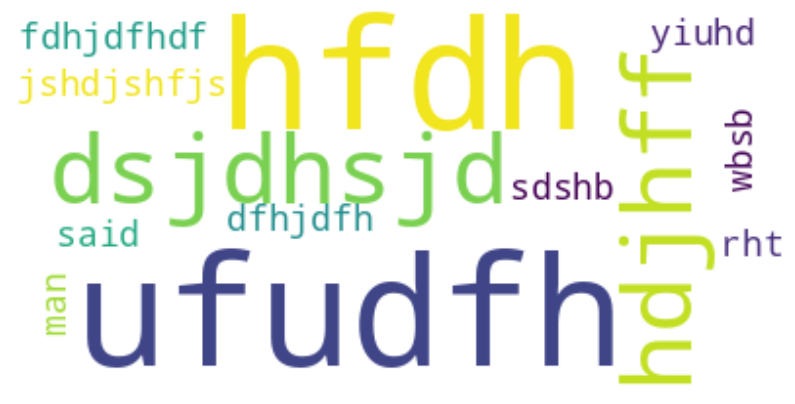

In [ ]:
# Resize the cloud

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Update Stopwords
stp_words=['man','said','one']
[book_stopwords.add(n) for n in stp_words]   # add the words said to stopwords

[None, None, None]

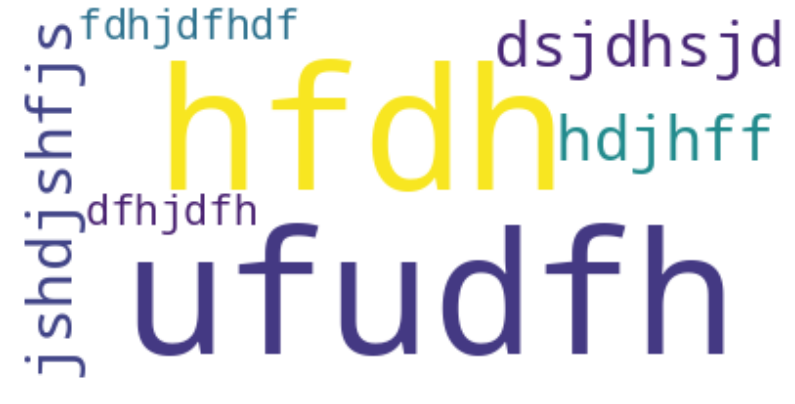

In [ ]:
# re-generate the word cloud
book_wc.generate(book)


# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

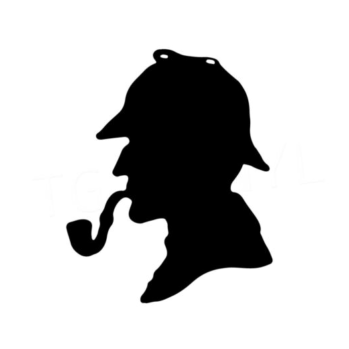

In [ ]:
# save mask for book
book_mask = np.array(Image.open('sherlock_mask.jpg'))

#Display mask

fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(8) # set height
plt.imshow(book_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

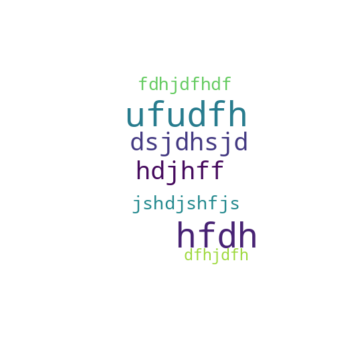

In [ ]:
# Superimposing the words onto a mask of any shape

# instantiate a word cloud object
book_wc = WordCloud(background_color='white', max_words=5000, mask=book_mask, stopwords=book_stopwords)

# generate the word cloud
book_wc.generate(book)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(8) # set height
plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

#Perform text Visualization on Amazon_Customer_Reviews.csv Dataset and draw 3 main insights.   


In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import  PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
df=pd.read_csv('/content/Amazon_customer_review.csv')

In [ ]:
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.dropna(how='all',axis=0,subset=['reviews.text'],inplace=True)

In [ ]:
def clean_text(text):
  ps=PorterStemmer()
  text_cleaned="".join([x for x in text if x is not string.punctuation])
  text_cleaned=re.sub(' +',' ',text_cleaned)
  text_cleaned=text_cleaned.lower()
  tokens=text_cleaned.split(" ")
  tokens=[token for token in tokens if token not in STOPWORDS]
  text_cleaned=" ".join([ps.stem(token) for token in tokens])
  
  return text_cleaned

In [ ]:
df['cleaned_reviews']=df['reviews.text'].apply(lambda x:clean_text(x))

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install vaderSentiment
import vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 7.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [ ]:
df['sentiment_score']=df['reviews.text'].apply(lambda x:compound_score(x))
df['sentiment_score']

0       0.9194
1       0.8934
2       0.4404
3       0.9882
4       0.7876
         ...  
5094    0.8858
5095    0.7906
5096    0.4404
5097    0.7456
5098    0.6249
Name: sentiment_score, Length: 5098, dtype: float64

In [ ]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [ ]:
df['review_category']=df['sentiment_score'].apply(lambda x :sentiment_category(x))

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Reviews Category')

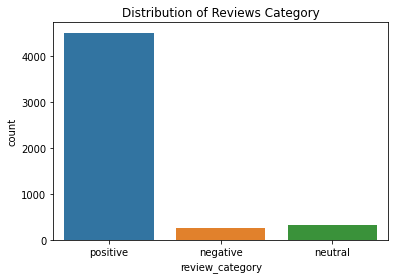

In [ ]:
import seaborn as sns
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [ ]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()
positive_reviews[0:5]

['product far disappointed. children love use abil monitor control content see ease.',
 'great beginn experienc person. bought gift love',
 'inexpens tablet use learn on, step nabi. thrill it, learn skype already...',
 'fire hd 8 two week now love it. tablet great value.w prime member tablet shines. love abl easili access prime content well movi download watch laterthi 1280/800 screen realli nice look nice crisp bright infact brighter ipad pro cost $900 base model. build fire insan awesom run 7.7mm thick smooth glossi feel back realli amaz hold futurist tab ur hands.',
 'bought grand daughter come visit. set user, enter age name now amazon make sure access site content appropri age. simpl love capabilities. bought instal 64gig sd card give littl tablet plenti storage. price think tablet best one there. spend hundr dollar addit speed capac come basic tablet everyth peopl will need fraction cost.']

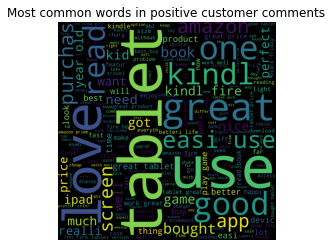

In [ ]:

from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

In [ ]:

negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['easi elderli user ceas ad pop up.',
 'realli tablet. given 5 star sometim push start sever time unlock screen littl annoying.',
 'fire tablet long batteri life. reason fast',
 'happi tablet. worst thing steal time. lol',
 'famili member vision problems. seen/us kindl anoth famili member - especi abil scale text. devic will make possibl read, extrem difficulti doing.']

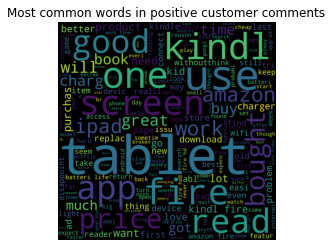

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [ ]:
getMostCommon(df['cleaned_reviews'].tolist(),topn=20)

[('tablet', 1721),
 ('great', 1604),
 ('love', 1295),
 ('use', 1255),
 ('kindl', 982),
 ('bought', 826),
 ('easi', 823),
 ('good', 792),
 ('read', 722),
 ('amazon', 695),
 ('fire', 684),
 ('work', 662),
 ('one', 619),
 ('it.', 610),
 ('price', 584),
 ('purchas', 486),
 ('app', 469),
 ('screen', 458),
 ('tablet.', 439),
 ('play', 378)]

In [ ]:
reviews_list=df['cleaned_reviews'].tolist()
import seaborn as sns

In [ ]:

def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

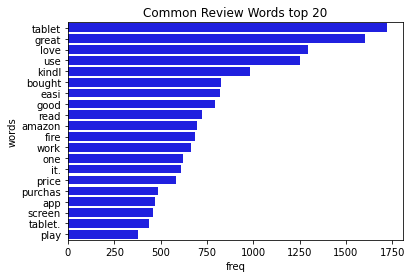

In [ ]:
plotMostCommonWords(reviews_list)

In [ ]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)
top_20_positive_review_words

[('tablet', 1595),
 ('great', 1576),
 ('love', 1277),
 ('use', 1144),
 ('kindl', 890),
 ('easi', 810),
 ('bought', 763),
 ('good', 755),
 ('read', 659),
 ('amazon', 645),
 ('fire', 593),
 ('work', 590),
 ('it.', 580),
 ('one', 552),
 ('price', 535),
 ('purchas', 451),
 ('app', 423),
 ('screen', 411),
 ('tablet.', 403),
 ('play', 360)]

In [ ]:

top_20_negative_review_words=getMostCommon(negative_reviews,20)
top_20_negative_review_words

[('tablet', 81),
 ('fire', 76),
 ('kindl', 69),
 ('use', 65),
 ('one', 44),
 ('amazon', 41),
 ('read', 36),
 ('screen', 34),
 ('bought', 34),
 ('app', 32),
 ('will', 31),
 ('work', 31),
 ('good', 29),
 ('buy', 29),
 ('price', 28),
 ('charg', 28),
 ('tablet.', 26),
 ('got', 22),
 ('new', 22),
 ('great', 22)]

In [ ]:

def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

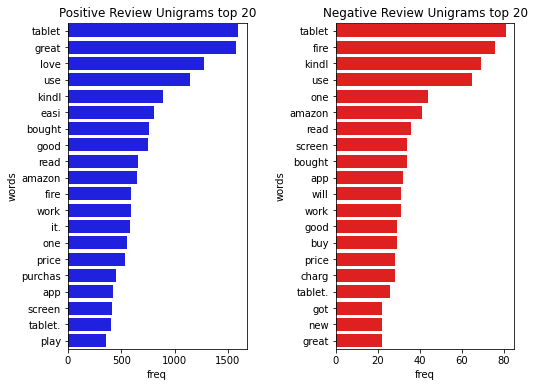

In [ ]:

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])